# 6月1日	第7章：単語ベクトル（60〜64）

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [2]:
conda install gensim

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::anaconda-client==1.8.0=py37hecd8cb5_0
  - defaults/osx-64::python-language-server==0.31.7=py37_0
  - defaults/noarch::jupyterlab_server==2.8.2=pyhd3eb1b0_0
  - defaults/osx-64::jupyter==1.0.0=py37_7
  - defaults/osx-64::spyder==4.0.1=py37_0
  - defaults/osx-64::widgetsnbextension==3.5.1=py37_0
  - defaults/noarch::importlib_metadata==4.8.1=hd3eb1b0_0
  - defaults/noarch::path.py==12.5.0=hd3eb1b0_0
  - defaults/noarch::pytest-astropy==0.8.0=py_0
  - defaults/noarch::nbclient==0.5.3=pyhd3eb1b0_0
  - defaults/osx-64::pytest-arraydiff==0.3=py37h39e3cac_0
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/osx-64::keyring==23.1.0=py37hecd8cb5_0
  - defaults/osx-64::distributed==2021.8.1=py37hecd8cb5_0
  - defaults/noarch::pytest-astropy-header==0.1.2=py_0
  - defaults/osx-64::anaconda-navigator==1.9.12=py37_0

In [3]:
import gensim

In [4]:
# load pre-trained word2vec model
googlenews_w2v = gensim.models.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin', binary=True)

In [5]:
googlenews_w2v['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ．

In [6]:
googlenews_w2v.similarity('United_States','U.S.')

0.73107743

## 62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [7]:
googlenews_w2v.most_similar('United_States',topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.7400725483894348),
 ('U.S.', 0.7310773730278015),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

## 63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [12]:
googlenews_w2v.most_similar(positive=['Spain','Athens'], negative=['Madrid'],topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400863289833069),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791338920593)]

In [18]:
googlenews_w2v.most_similar(positive=['Spain','Athens'], negative=['Madrid'],topn=1)

[('Greece', 0.6898480653762817)]

In [17]:
googlenews_w2v.most_similar(positive=['Spain','Athens'], negative=['Madrid'],topn=1)[0]

('Greece', 0.6898480653762817)

## 64. アナロジーデータでの実験

単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [49]:
with open('data/questions-words.txt') as f:
    lines = f.read().splitlines()
    print(lines)

[': capital-common-countries', 'Athens Greece Baghdad Iraq', 'Athens Greece Bangkok Thailand', 'Athens Greece Beijing China', 'Athens Greece Berlin Germany', 'Athens Greece Bern Switzerland', 'Athens Greece Cairo Egypt', 'Athens Greece Canberra Australia', 'Athens Greece Hanoi Vietnam', 'Athens Greece Havana Cuba', 'Athens Greece Helsinki Finland', 'Athens Greece Islamabad Pakistan', 'Athens Greece Kabul Afghanistan', 'Athens Greece London England', 'Athens Greece Madrid Spain', 'Athens Greece Moscow Russia', 'Athens Greece Oslo Norway', 'Athens Greece Ottawa Canada', 'Athens Greece Paris France', 'Athens Greece Rome Italy', 'Athens Greece Stockholm Sweden', 'Athens Greece Tehran Iran', 'Athens Greece Tokyo Japan', 'Baghdad Iraq Bangkok Thailand', 'Baghdad Iraq Beijing China', 'Baghdad Iraq Berlin Germany', 'Baghdad Iraq Bern Switzerland', 'Baghdad Iraq Cairo Egypt', 'Baghdad Iraq Canberra Australia', 'Baghdad Iraq Hanoi Vietnam', 'Baghdad Iraq Havana Cuba', 'Baghdad Iraq Helsinki Finl

In [50]:
for i, line in enumerate(tqdm(lines[:10])):
    words = line.split()
    print('words :', words)
    
    answer=[]
    
    if line.startswith(':'): # カテゴリー名
        output = line
    
    else:
        # vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)
        ans = googlenews_w2v.most_similar(positive=[words[1],words[2]], negative=[words[0]],topn=1)[0]
        print('ans : ', ans)
            
        # ans[0] : 単語、 ans[1] : 類似度
        answer += [ans[0], str(ans[1])]
            
        print('ans[0] : ',ans[0], ' ans[1] : ', ans[1])
        print('answer : ', answer)
            
        output = ' '.join(answer)+'\n'
    
    print('output : ', output)

  0%|          | 0/10 [00:00<?, ?it/s]

words : [':', 'capital-common-countries']
output :  : capital-common-countries
words : ['Athens', 'Greece', 'Baghdad', 'Iraq']


 20%|██        | 2/10 [00:01<00:06,  1.32it/s]

ans :  ('Iraqi', 0.6351870894432068)
ans[0] :  Iraqi  ans[1] :  0.6351870894432068
answer :  ['Iraqi', '0.6351870894432068']
output :  Iraqi 0.6351870894432068

words : ['Athens', 'Greece', 'Bangkok', 'Thailand']


 30%|███       | 3/10 [00:01<00:03,  1.86it/s]

ans :  ('Thailand', 0.7137669920921326)
ans[0] :  Thailand  ans[1] :  0.7137669920921326
answer :  ['Thailand', '0.7137669920921326']
output :  Thailand 0.7137669920921326

words : ['Athens', 'Greece', 'Beijing', 'China']


 40%|████      | 4/10 [00:01<00:02,  2.36it/s]

ans :  ('China', 0.7235777378082275)
ans[0] :  China  ans[1] :  0.7235777378082275
answer :  ['China', '0.7235777378082275']
output :  China 0.7235777378082275

words : ['Athens', 'Greece', 'Berlin', 'Germany']


 50%|█████     | 5/10 [00:02<00:01,  2.80it/s]

ans :  ('Germany', 0.6734622716903687)
ans[0] :  Germany  ans[1] :  0.6734622716903687
answer :  ['Germany', '0.6734622716903687']
output :  Germany 0.6734622716903687

words : ['Athens', 'Greece', 'Bern', 'Switzerland']


 60%|██████    | 6/10 [00:02<00:01,  3.24it/s]

ans :  ('Switzerland', 0.4919748902320862)
ans[0] :  Switzerland  ans[1] :  0.4919748902320862
answer :  ['Switzerland', '0.4919748902320862']
output :  Switzerland 0.4919748902320862

words : ['Athens', 'Greece', 'Cairo', 'Egypt']


 70%|███████   | 7/10 [00:02<00:00,  3.56it/s]

ans :  ('Egypt', 0.7527809739112854)
ans[0] :  Egypt  ans[1] :  0.7527809739112854
answer :  ['Egypt', '0.7527809739112854']
output :  Egypt 0.7527809739112854

words : ['Athens', 'Greece', 'Canberra', 'Australia']


 80%|████████  | 8/10 [00:02<00:00,  3.75it/s]

ans :  ('Australia', 0.583732545375824)
ans[0] :  Australia  ans[1] :  0.583732545375824
answer :  ['Australia', '0.583732545375824']
output :  Australia 0.583732545375824

words : ['Athens', 'Greece', 'Hanoi', 'Vietnam']


 90%|█████████ | 9/10 [00:03<00:00,  3.79it/s]

ans :  ('Viet_Nam', 0.6276341676712036)
ans[0] :  Viet_Nam  ans[1] :  0.6276341676712036
answer :  ['Viet_Nam', '0.6276341676712036']
output :  Viet_Nam 0.6276341676712036

words : ['Athens', 'Greece', 'Havana', 'Cuba']


100%|██████████| 10/10 [00:03<00:00,  2.94it/s]

ans :  ('Cuba', 0.6460990905761719)
ans[0] :  Cuba  ans[1] :  0.6460990905761719
answer :  ['Cuba', '0.6460990905761719']
output :  Cuba 0.6460990905761719



In [51]:
# tqdmは進捗状況や処理状況をプログレスバー（ステータスバー）として表示する機能
from tqdm import tqdm

In [55]:
with open('data/64.txt','w') as f: # 書き込み
    
    for i, line in enumerate(tqdm(lines)):
        words = line.split()
        #print('words :', words)
    
        answer=[]
    
        if line.startswith(':'): # カテゴリー名
            output = line
    
        else:
            # vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)
            ans = googlenews_w2v.most_similar(positive=[words[1],words[2]], negative=[words[0]],topn=1)[0]
            #print('ans : ', ans)
            
            # ans[0] : 単語、 ans[1] : 類似度
            answer += [ans[0], str(ans[1])]
            
            #print('ans[0] : ',ans[0], ' ans[1] : ', ans[1])
            #print('answer : ', answer)
            
            output = ' '.join(answer)+'\n'
    
        #print('output : ', output)
    
        f.write(output)

100%|██████████| 19558/19558 [1:12:21<00:00,  4.50it/s]


## 65. アナロジータスクでの正解率

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

意味的アナロジーと文法的アナロジーはquestions-words.txtにおける分類らしい

In [57]:
import pandas as pd

In [59]:
df = pd.read_csv("data/64.txt", sep=" ", header=None)

# 意味的アナロジー（semantic analogy） : gramという文字列が含まれているカテゴリーが含まれていないデータ
sem = df[~df[0].str.contains("gram")] # カテゴリ情報はデータの1列目、df[0]

# 文法的アナロジー（syntactic analogy） : gramという文字列が含まれているデータのみを抽出
syn = df[df[0].str.contains("gram")]

print('意味的アナロジー正解率 : ', (sem[3] == sem[4]).sum() / len(sem))
print('文法的アナロジー正解率 : ', (syn[3] == syn[4]).sum() / len(syn))

KeyError: 3

## 66. WordSimilarity-353での評価

The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [60]:
import zipfile

In [61]:
#df = pd.read_csv('data/wordsim353.zip/combined.csv')
# zipファイルから読み込む
with zipfile.ZipFile('data/wordsim353.zip') as zip_f:
    df = pd.read_csv(zip_f.open('combined.csv'))

sim = []
for i in range(len(df)):
    line = df.iloc[i] # ilocはindexを指定することで特定の値を抽出できる
    sim.append(googlenews_w2v.similarity(line['Word 1'],line['Word 2']))
    
df['w2v'] = sim 
df[['Human (mean)', 'w2v']].corr(method='spearman')

,Human (mean),w2v
Human (mean),1.000000,0.700017
w2v,0.700017,1.000000


## 67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

questions-words.txtのカテゴリcapital-common-countries, capital-worldから国名を収集する。

In [63]:
with open("data/questions-words.txt") as f:
    lines = f.readlines()

cots = []
for line in lines:
    if line.startswith(": currency"):
        break
    elif line.startswith(":"):
        continue
    else:
        _, a, _, b = line.rstrip("\n").split()
        cots += [a, b]

dct = {}
for e in set(cots):
    if e in googlenews_w2v:
        dct[e] = googlenews_w2v[e]

sklearn KMeans でクラスタリング

In [64]:
from sklearn.cluster import KMeans

In [65]:
pred = KMeans(n_clusters=5).fit_predict(list(dct.values()))

print([list(dct.keys())[i] for i, p in enumerate(pred) if p == 0])

['Pakistan', 'Iraq', 'Afghanistan', 'Indonesia', 'Taiwan', 'Oman', 'Samoa', 'China', 'Australia', 'Bhutan', 'Laos', 'Canada', 'Philippines', 'Fiji', 'Jordan', 'Japan', 'Vietnam', 'Bahrain', 'Thailand', 'Bangladesh', 'Nepal', 'Greenland', 'Qatar', 'Lebanon', 'Tuvalu']


In [66]:
from collections import Counter

In [67]:
c = Counter(pred)
print(c)

Counter({1: 33, 4: 30, 0: 25, 2: 15, 3: 13})


## 68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

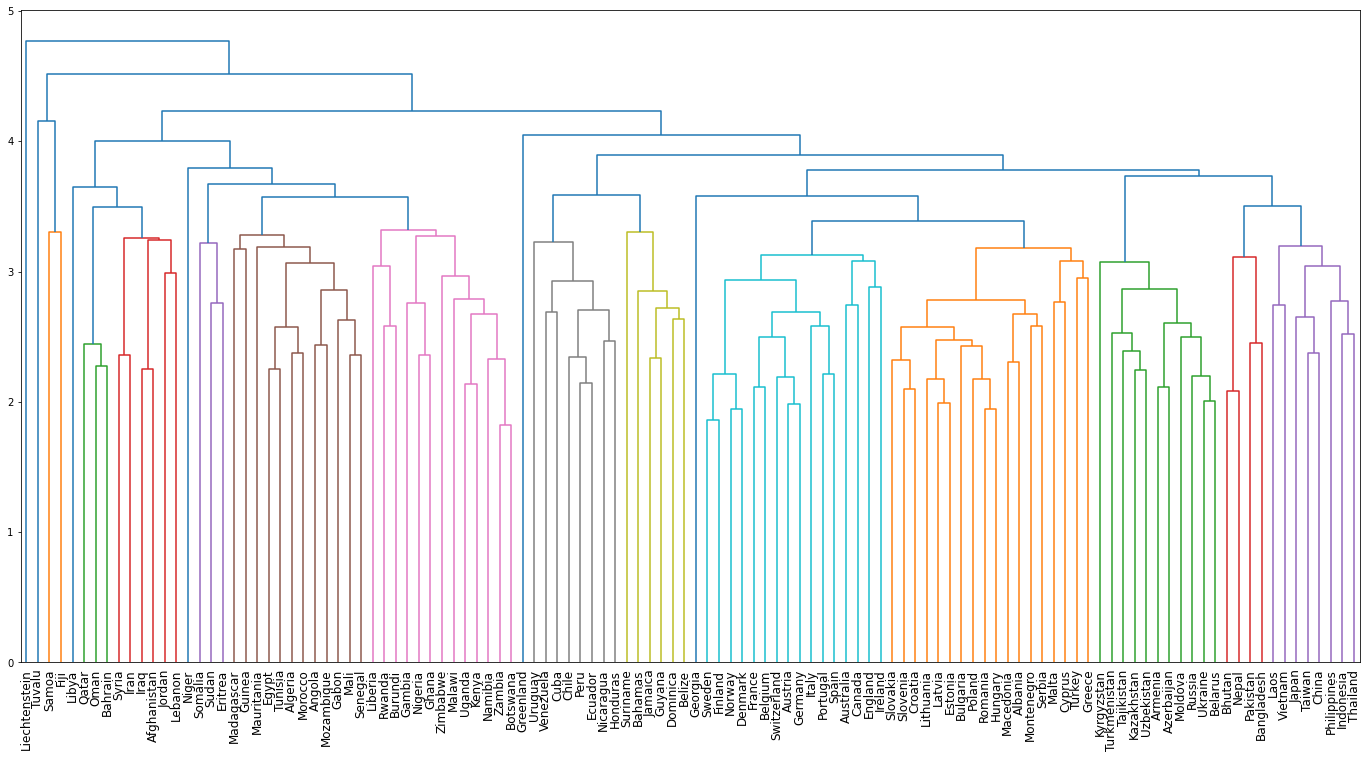

In [69]:
plt.figure(figsize=(24, 12))
Z = linkage(list(dct.values()), method="weighted", metric="euclidean")
dendrogram(Z, labels=list(dct.keys()))
plt.xticks(fontsize=12)
plt.show()

## 69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [70]:
from sklearn.manifold import TSNE

In [71]:
tsne = TSNE()
tsne.fit(list(dct.values()))

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

TSNE()

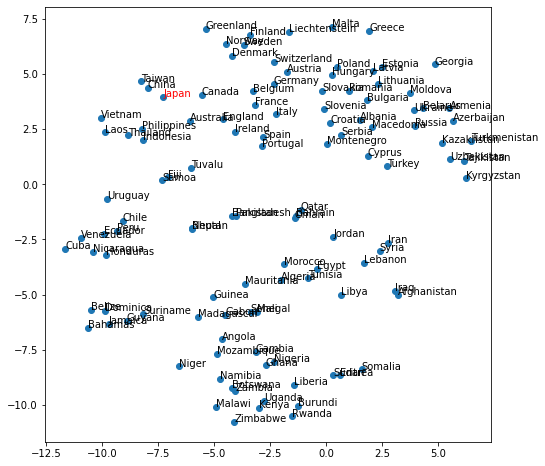

In [72]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])

for (x, y), name in zip(tsne.embedding_, list(dct.keys())):
    if name == "Japan":
        plt.annotate(name, (x, y), color='r')
    else:
        plt.annotate(name, (x, y))
plt.show()